<a href="https://colab.research.google.com/github/Shrason/Machine-Learning/blob/main/SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data_set = pd.read_csv('Salary_data.csv')
data_set

,Position,Grade,Salary
0,New Associate,1,17000
1,Associate,2,27000
2,Analyst,3,40000
3,Senior Analyst,4,65000
4,Team Lead,5,100000
5,Associate Manager,6,150000
6,Manager,7,250000
7,Senior Manager,8,400000
8,Leadership,9,650000
9,Senior Leadership,10,1000000


In [ ]:
X = data_set.iloc[:,1:-1].values
y = data_set.iloc[:,-1].values

In [ ]:
y = y.reshape(len(y),1)
y

array([[  17000],
       [  27000],
       [  40000],
       [  65000],
       [ 100000],
       [ 150000],
       [ 250000],
       [ 400000],
       [ 650000],
       [1000000],
       [1800000],
       [4000000]], dtype=int64)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [ ]:
print(X)

[[-1.52973232]
 [-1.25977956]
 [-0.9898268 ]
 [-0.71987403]
 [-0.44992127]
 [-0.17996851]
 [ 0.08998425]
 [ 0.35993702]
 [ 0.62988978]
 [ 0.89984254]
 [ 1.43974807]
 [ 1.70970083]]


In [ ]:
print(y)

[[-0.62024154]
 [-0.61126879]
 [-0.59960421]
 [-0.57717233]
 [-0.54576769]
 [-0.50090393]
 [-0.4111764 ]
 [-0.27658511]
 [-0.05226629]
 [ 0.26178007]
 [ 0.9796003 ]
 [ 2.95360593]]


In [ ]:
from sklearn.svm import SVR
regresssor = SVR(kernel = 'rbf')
regresssor.fit(X, y)

c:\Users\shrad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:
regresssor.predict(sc_X.transform([[6.5]]))

array([0.05988218])

In [ ]:
sc_y.transform(regresssor.predict(sc_X.transform([[6.5]])).reshape(-1,1))

array([[-0.63549517]])

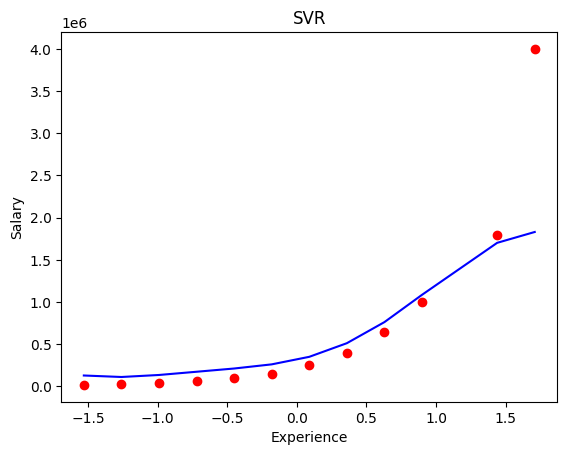

In [ ]:
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y),color = 'red')
plt.plot(sc_X.inverse_transform(X),sc_y.inverse_transform(regresssor.predict(X).reshape(-1,1)),color = 'blue')
plt.title('SVR')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()